# Credit Card Fraud Detector (Group 2)

**MEMBERS**: ADRIAN ANG, AGNES TAN, JABEZ NG

**Practical Motivation | Problem Formulation**

**Background** 

Credit card fraud is a growing concern in today's digital age with vast implications in terms of cost on the government, corporate organizations, financial industry and consumers. With the widespread proliferation of the internet technology, this had led to increased convenience with credit card transactions. However, this has resulted in the expedition of credit card frauds as well. In a CNA article, about $500,000 was stolen in fraudulent card payments involving diversion of SMS one-time passwords, from September to December 2020. This leads us to our mini project which is to leverage on machine learning to effectively detect credit card fraud. 

**What is credit card fraud?** 

Credit card fraud involves the unauthorized use of another individual's credit card or account information to make unauthorized payments or access of funds. 

**Problem statement** 

The credit card detection problem involves modelling past credit card transactions with the knowledge of the ones that turned out to be fraudulent. The model will then be tested on a test set to see if we can accurately identify which transaction is fraudulent. We aim to achieve a 100% accuracy rate in detection. With the success of the credit card fraud detector, we would be able to greatly minimize the potential loss of large amounts of funds, saving consumers and businesses the time and resources needed to resolve the fraud transaction. Moreover, being able to recognize fraudulent credit card transactions mitigates against the costs that consumers may incur for items they did not purchase. 

**Challenges** 

Credit card transaction datasets are highly imbalanced and skewed. Imbalanced data can negatively affect model performance and precision because we are using a binary classifier (Fraud vs no fraud). We may also end up with the problem where a low FPR is obtained despite high number of false positives.  Furthermore, fraudulent behavior profile is dynamic and tend to look like legitimate transactions, thereby making it difficult to detect.  

**Sample Collection**

Dataset: https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv

It is a simulated credit card transaction dataset containing legitimate and fraudulent transactions from the duration of 1 January 2019 – 31 Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. Simulation source is from Sparkov Data Generation | Github tool created by Brandon Harris. 

**Variables** 

1. **index** - Unique Identifier for each row 


2. **transdatetrans_time** - Transaction DateTime 


3. **cc_num** - Credit Card Number of Customer


4. **merchant** - Merchant Name


5. **category** - Category of Merchant


6. **amt** - Amount of Transaction


7. **first** - First Name of Credit Card Holder


8. **last** - Last Name of Credit Card Holder 


9. **gender** - Gender of Credit Card Holder 


10. **street** - Street Address of Credit Card Holder 


11. **city** - City of Credit Card Holder 


12. **state** - State of Credit Card Holder 


13. **zip** - Zip of Credit Card Holder 


14. **lat** - Latitude Location of Credit Card Holder 


15. **long** - Longitude Location of Credit Card Holder 


16. **city_pop** - Credit Card Holder's City Population 


17. **job** - Job of Credit Card Holder


18. **dob** - Date of Birth of Credit Card Holder


19. **trans_num** - Transaction Number 


20. **unix_time** - UNIX Time of transaction 


21. **merch_lat** - Latitude Location of Merchant


22. **merch_long** - Longitude Location of Merchant 


23. **is_fraud** - Fraud Flag <--- Target Class 

# Content Section

- **Understanding the dataset and cleaning**


- **Exploratory Data Analysis (EDA)**


- **Feature Engineering**


- **Train-Test Split**


- **Feature Label Encoding**


- **Feature Selection**


- **Scaling**
    1. Robust Scaler
    2. MinMax Scaler
    3. Standard Scaler
    
    
- **Class imbalance**
    1. Under sampling
    2. Over sampling
    3. SMOTE   
    


- **Model building and testing**
    1. Naive Bayes (Gaussian)  
    2. Random Forest Classifier        
    3. K Nearest Neighbors 
    4. XGBoost (Classifier)


- **Evaluation and conclusion**

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit
#!pip install haversine
import math
import matplotlib
import sklearn

In [2]:
df=pd.read_csv('fraudTest.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

From the info, the number of rows is 555,718. This is a significant amount of data and as such we will reduce this amount by a scale of 0.1. Note that we will scale each of the classes 'is_fraud'=1 and 'is_fraud'=0 before concatenating the two extracted sets together.

## Extraction

In [5]:
Fraud = df[df['is_fraud'] == 1] 
Fraud = Fraud.sample(frac=0.01) 
NotFraud = df[df['is_fraud'] == 0] 
NotFraud = NotFraud.sample(frac=0.01) 
data = pd.concat([Fraud, NotFraud]) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557 entries, 492141 to 520019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5557 non-null   int64  
 1   trans_date_trans_time  5557 non-null   object 
 2   cc_num                 5557 non-null   int64  
 3   merchant               5557 non-null   object 
 4   category               5557 non-null   object 
 5   amt                    5557 non-null   float64
 6   first                  5557 non-null   object 
 7   last                   5557 non-null   object 
 8   gender                 5557 non-null   object 
 9   street                 5557 non-null   object 
 10  city                   5557 non-null   object 
 11  state                  5557 non-null   object 
 12  zip                    5557 non-null   int64  
 13  lat                    5557 non-null   float64
 14  long                   5557 non-null   float64
 1

After extraction, the number of entries has been reduced to 5557 from 555,718.

In [6]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
492141,492141,2020-12-17 23:01:57,639046421587,"fraud_Swaniawski, Lowe and Robel",shopping_pos,751.63,Dylan,Bonilla,M,2497 John Motorway Suite 922,...,40.5662,-80.2099,1140,"Administrator, education",1986-06-20,519228eb91276960abd7867b23305747,1387321317,39.594265,-79.766653,1
327216,327216,2020-10-24 20:25:22,4599285557366057,"fraud_Reichert, Shanahan and Hayes",shopping_net,1140.88,Mary,Williams,F,00315 Ashley Valleys,...,38.0261,-97.6666,1689,Gaffer,1997-11-18,93f5d23515f0e7b79ffa206878839c78,1382646322,38.541845,-97.111516,1
306516,306516,2020-10-15 05:53:35,30042378430132,fraud_Pacocha-O'Reilly,grocery_pos,290.54,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,...,40.9051,-73.3309,21902,Tour manager,1976-05-16,3b292a501d58f4364444c292ab686bd3,1381816415,40.923037,-73.584108,1
314352,314352,2020-10-18 23:49:12,4958589671582726883,"fraud_Lehner, Mosciski and King",misc_net,751.72,Aaron,Pena,M,793 Hooper Tunnel Suite 154,...,38.7894,-77.2818,43102,Health visitor,1950-11-27,05736e17f30fcd9244214a998768bee3,1382140152,39.181157,-76.813395,1
323807,323807,2020-10-23 00:03:37,4481131401752,"fraud_Bernier, Volkman and Hoeger",misc_net,680.39,Frank,Foster,M,37910 Ward Lights,...,42.2848,-71.7205,35299,English as a second language teacher,1975-04-30,2e96700c6d5e4de61fc8907bc44420dd,1382486617,42.056592,-71.548881,1


In [7]:
#Reset the indexes
data = data.reset_index(drop=True)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,492141,2020-12-17 23:01:57,639046421587,"fraud_Swaniawski, Lowe and Robel",shopping_pos,751.63,Dylan,Bonilla,M,2497 John Motorway Suite 922,...,40.5662,-80.2099,1140,"Administrator, education",1986-06-20,519228eb91276960abd7867b23305747,1387321317,39.594265,-79.766653,1
1,327216,2020-10-24 20:25:22,4599285557366057,"fraud_Reichert, Shanahan and Hayes",shopping_net,1140.88,Mary,Williams,F,00315 Ashley Valleys,...,38.0261,-97.6666,1689,Gaffer,1997-11-18,93f5d23515f0e7b79ffa206878839c78,1382646322,38.541845,-97.111516,1
2,306516,2020-10-15 05:53:35,30042378430132,fraud_Pacocha-O'Reilly,grocery_pos,290.54,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,...,40.9051,-73.3309,21902,Tour manager,1976-05-16,3b292a501d58f4364444c292ab686bd3,1381816415,40.923037,-73.584108,1
3,314352,2020-10-18 23:49:12,4958589671582726883,"fraud_Lehner, Mosciski and King",misc_net,751.72,Aaron,Pena,M,793 Hooper Tunnel Suite 154,...,38.7894,-77.2818,43102,Health visitor,1950-11-27,05736e17f30fcd9244214a998768bee3,1382140152,39.181157,-76.813395,1
4,323807,2020-10-23 00:03:37,4481131401752,"fraud_Bernier, Volkman and Hoeger",misc_net,680.39,Frank,Foster,M,37910 Ward Lights,...,42.2848,-71.7205,35299,English as a second language teacher,1975-04-30,2e96700c6d5e4de61fc8907bc44420dd,1382486617,42.056592,-71.548881,1


In [8]:
#Finding unique values in each column
data.nunique()

Unnamed: 0               5557
trans_date_trans_time    5554
cc_num                    882
merchant                  690
category                   14
amt                      4292
first                     326
last                      458
gender                      2
street                    882
city                      814
state                      50
zip                       872
lat                       870
long                      871
city_pop                  799
job                       464
dob                       870
trans_num                5557
unix_time                5554
merch_lat                5556
merch_long               5557
is_fraud                    2
dtype: int64

## Check for NULL values

In [9]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Alright clearly there is **NO** missing values to correct!

# Checking for duplicates

In [10]:
duplicate = data[data.duplicated()]
print("Duplicate Rows : ")
duplicate

Duplicate Rows : 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


We can observe that there are **NO** duplicated rows for us to remove. 

## Exploratory Data Analysis (EDA) 

**Data Visualization**

It seems clear that 'Unnamed: 0' is just the index variable and not useful as a numeric data. So we will drop it when we visualise the correlation plot. 

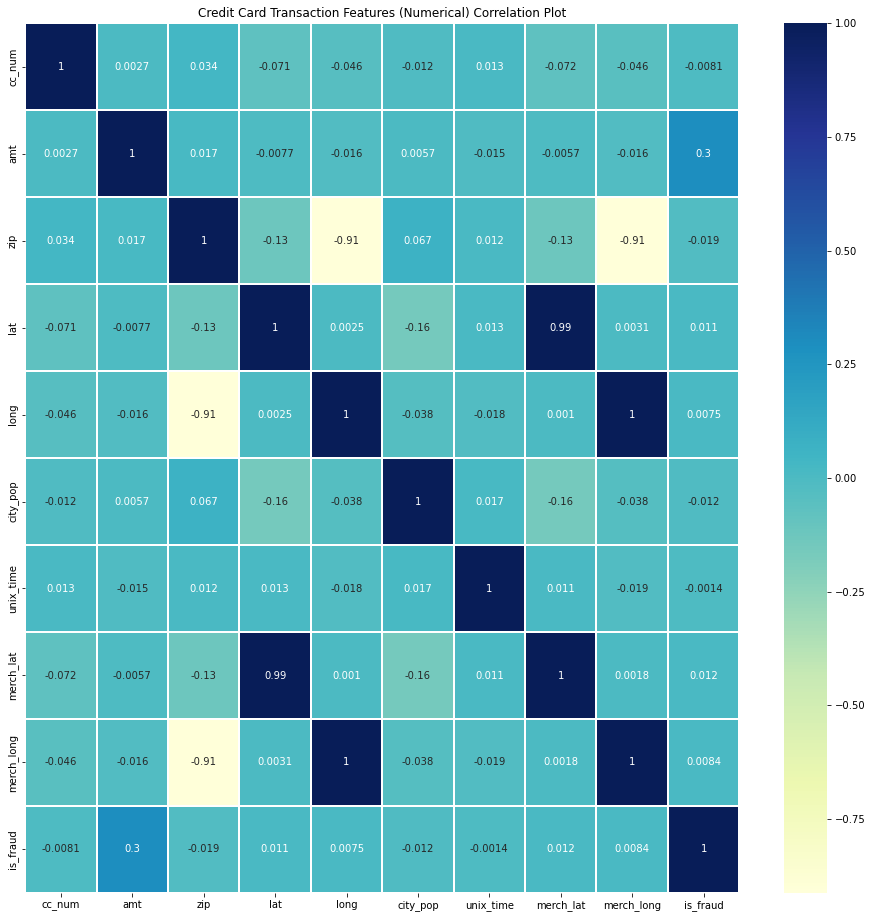

In [11]:
df2 = data.drop(columns='Unnamed: 0')
fig, ax = plt.subplots(figsize=(16,16))
plt.title('Credit Card Transaction Features (Numerical) Correlation Plot')
sns.heatmap(df2.corr(), annot=True, linewidths=.1, cmap="YlGnBu")
plt.show()

We can see from the heatmap that **'amount'** is the **MOST** closely related to **'is_fraud'**. Overall, the correlations seem rather weak and the raw data will **NOT** be very useful in building our model. We will thus have to perform feature engineering to generate better features to obtain better results. 

In [12]:
data.loc[df['is_fraud'] == 1].sort_values('amt', ascending=False).head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1781,450881,2020-12-08 13:28:09,3504178999463051,fraud_Wilkinson Ltd,entertainment,186.97,Drew,Garcia,M,70858 Jasmine Meadows Apt. 135,...,40.7641,-84.0973,86954,"Copywriter, advertising",1992-07-23,ec0aa430f09cd74753f2723b650efbd1,1386509289,39.879062,-84.491846,0


We can see that **Drew Garcia, Male** was scammed with the highest amount of **$186.97**.

<AxesSubplot:title={'center':'Number of frauds by gender'}, xlabel='gender', ylabel='is_fraud'>

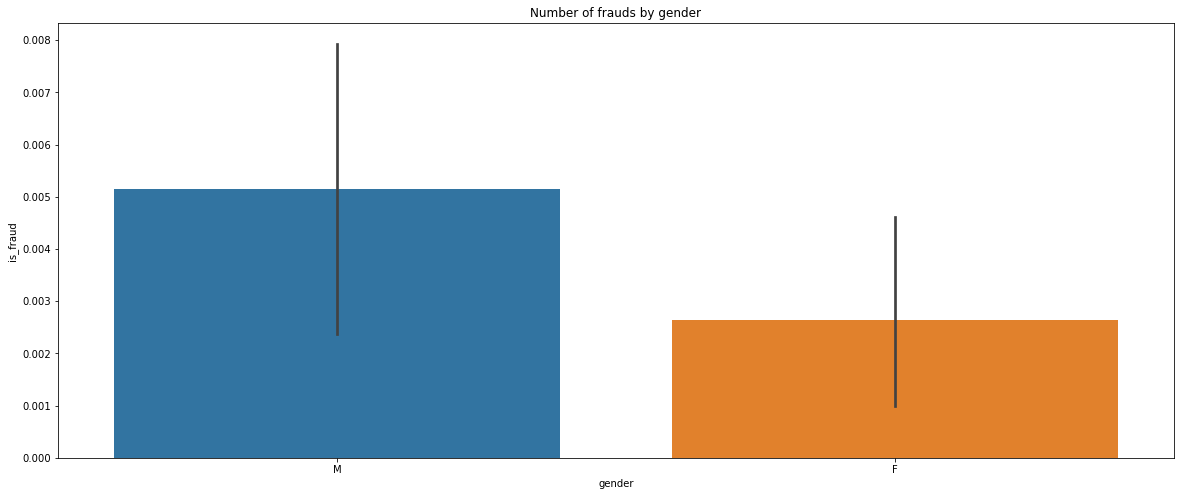

In [13]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sns.barplot(x="gender", y='is_fraud' ,data=data)

From the above barplot diagram we can see that **Males** take up a higher proportion of individuals with fraud transactions.

<AxesSubplot:title={'center':'Number of frauds by category'}, xlabel='category', ylabel='is_fraud'>

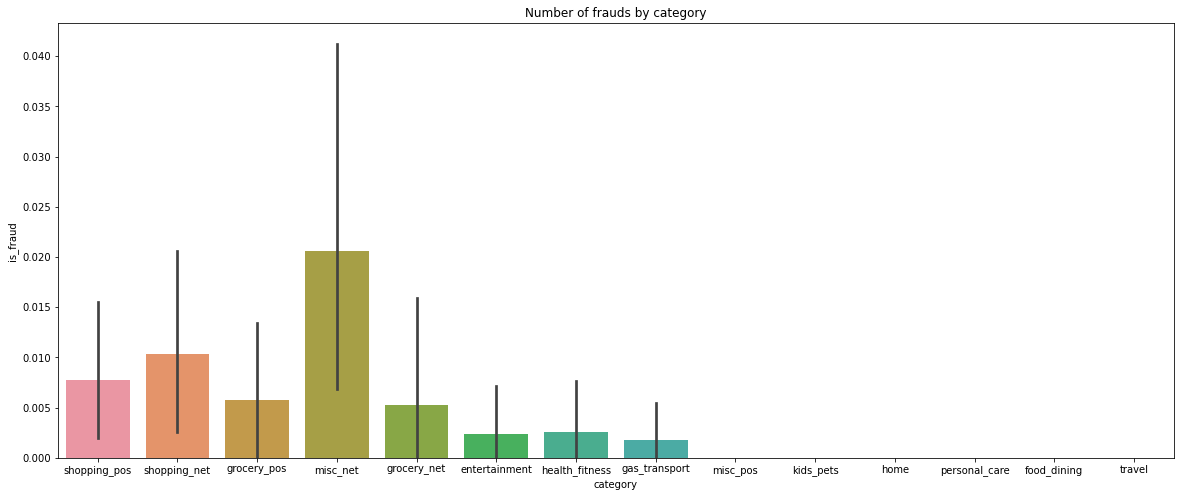

In [14]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=data)

We can also see that the category with the **MOST** number of fraudulant transactions is **misc_net**

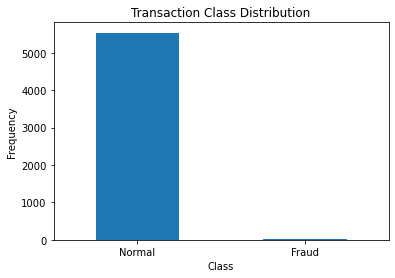

In [15]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

We can observe the huge imbalance in data in terms of the variable **'is_fraud'**. We will work on resolving the imbalance issue later using different techniques.

**We will now look at the distributions of some of the CATEGORICAL variables, Gender and Job as the number of unique values are not too high**

<AxesSubplot:>

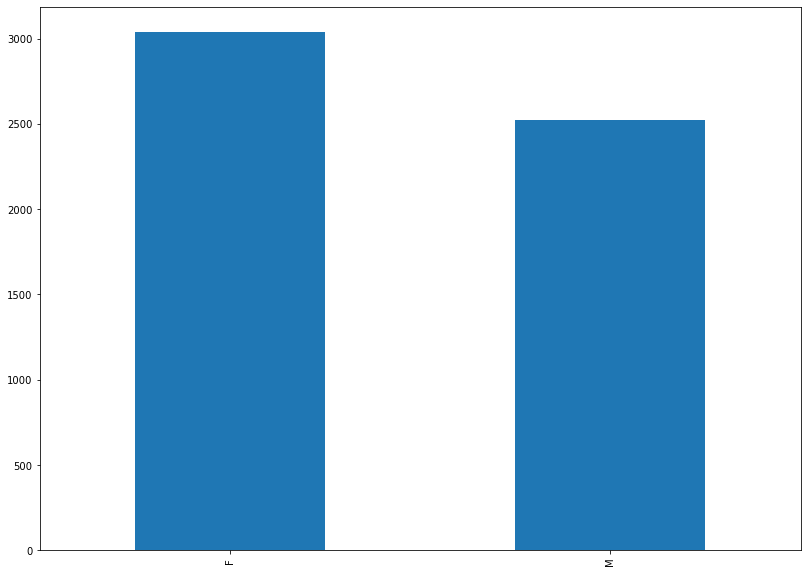

In [16]:
# Distribution of Gender
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
data['gender'].value_counts().plot.bar()

In [17]:
# Specifics
gender = data[['gender','trans_num']].groupby(['gender']).count().reset_index()
gender.columns = ['Gender', 'Total Count']
gender['Percentage'] = (gender['Total Count']/gender['Total Count'].sum())*100
gender

,Gender,Total Count,Percentage
0,F,3036,54.633795
1,M,2521,45.366205


So we can see that there is a greater proportion of the people carrying out the transactions who are **Females**

In [18]:
# In relation to is_fraud
genderf = data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
genderf.columns = ['Gender','is_fraud','Count']
genderf = genderf.merge(gender[['Gender','Total Count']])
genderf['Percentage'] = (genderf['Count']/genderf['Total Count'].sum())*100
genderf

,Gender,is_fraud,Count,Total Count,Percentage
0,F,0,3028,3036,27.244916
1,F,1,8,3036,0.071981
2,M,0,2508,2521,22.566133
3,M,1,13,2521,0.116970


<AxesSubplot:>

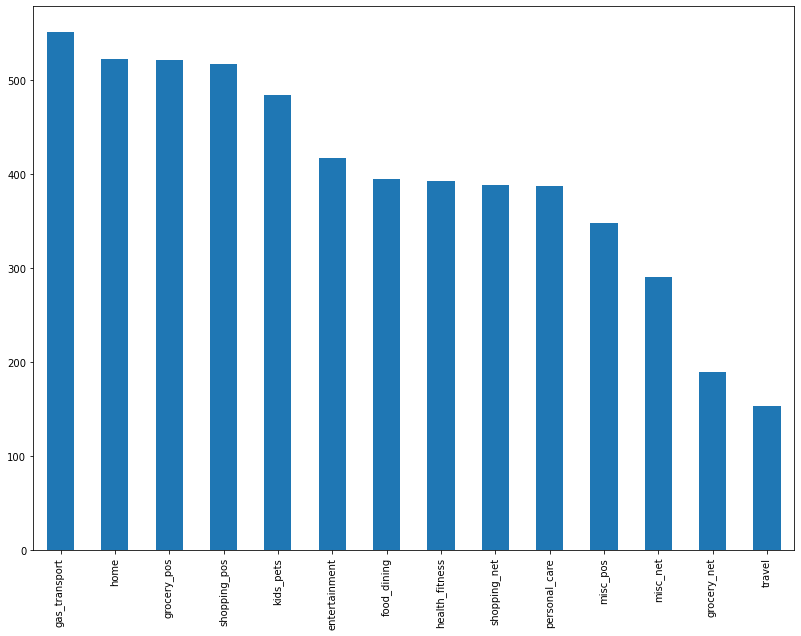

In [19]:
# Distribution of category
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
data['category'].value_counts().plot.bar()

In [20]:
# Specifics
category = data[['category','trans_num']].groupby(['category']).count().reset_index()
category.columns = ['Category', 'Total Count']
category['Percentage'] = (category['Total Count']/category['Total Count'].sum())*100
category.sort_values(by = ['Percentage'], ascending=False).reset_index()
category

,Category,Total Count,Percentage
0,entertainment,417,7.504049
1,food_dining,395,7.108152
2,gas_transport,551,9.915422
3,grocery_net,189,3.401116
4,grocery_pos,521,9.375562
5,health_fitness,393,7.072161
6,home,523,9.411553
7,kids_pets,484,8.709735
8,misc_net,291,5.236638
9,misc_pos,348,6.262372


So we can see that **entertainment** has the highest count amount the rest of the categories

In [21]:
# In relation to is_fraud
categoryf = data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
categoryf.columns = ['Category','is_fraud','Count']
categoryf = categoryf.merge(category[['Category','Total Count']])
categoryf['Percentage'] = (categoryf['Count']/genderf['Total Count'].sum())*100
categoryf

,Category,is_fraud,Count,Total Count,Percentage
0,entertainment,0,416,417,3.743027
1,entertainment,1,1,417,0.008998
2,food_dining,0,395,395,3.554076
3,gas_transport,0,550,551,4.948713
4,gas_transport,1,1,551,0.008998
5,grocery_net,0,188,189,1.691560
6,grocery_net,1,1,189,0.008998
7,grocery_pos,0,518,521,4.660788
8,grocery_pos,1,3,521,0.026993
9,health_fitness,0,392,393,3.527083


We will now visualise the **numerical variables** in the dataset.

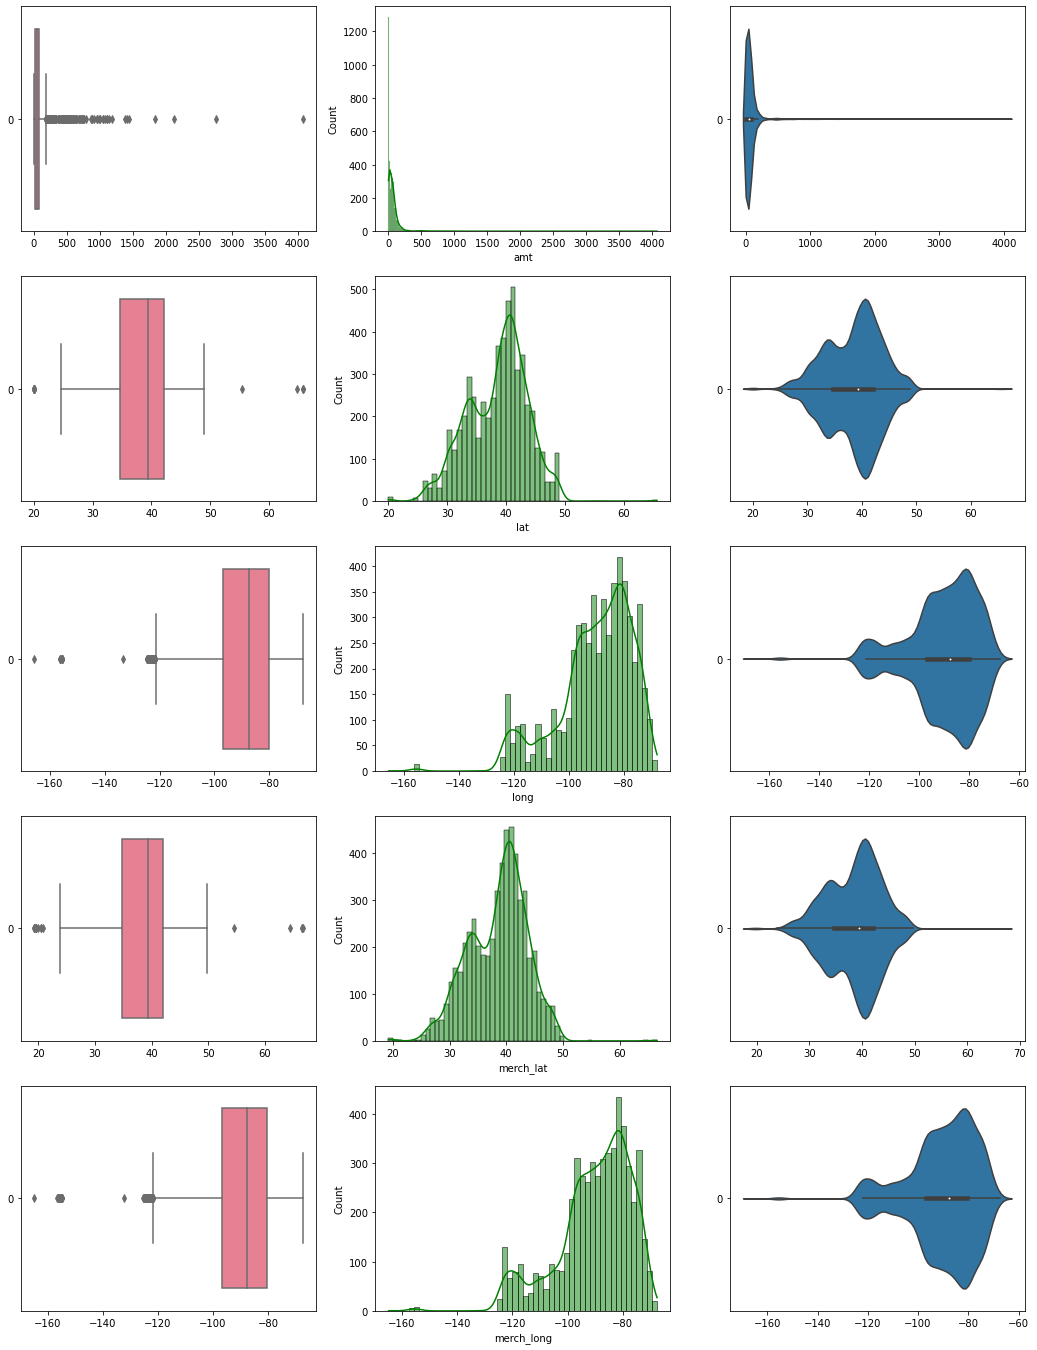

In [22]:
# BEFORE removing outliers
data_numeric = data[['amt', 'lat', 'long', 'merch_lat', 'merch_long']]
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in data_numeric:
    sns.boxplot(data = data_numeric[var], orient = "h", ax = axes[count,0], palette='husl')
    sns.histplot(data = data_numeric[var], ax = axes[count,1], kde = True, color='green')
    sns.violinplot(data = data_numeric[var], orient = "h", ax = axes[count,2])
    count += 1

We can see that there are some outliers, **HOWEVER** we **SHOULD NOT** remove such outliers. These outliers arise **NOT because of measurement error** but they are **NATURAL OUTLIERS** due to the nature of our dataset.

In [23]:
# Rough Statistics for Amount
pd.concat(
[data['amt'].describe(percentiles = [0.25,0.5,0.75])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.25,0.5,0.75])\
.reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.25,0.5,0.75])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,5557.000000,5536.000000,21.000000
1,mean,66.858985,64.618663,657.450476
2,std,122.596104,115.201198,367.172335
3,min,1.010000,1.010000,17.100000
4,25%,9.680000,9.640000,307.550000
5,50%,46.110000,45.785000,748.430000
6,75%,80.450000,80.150000,949.250000
7,max,4074.560000,4074.560000,1183.930000


## Feature Engineering

As we have noticed earlier, we have to generate a few features to help us to obtain a better model.

*(Aggregation process of 2 variables is EXTREMELY slow so avoid that)*

We are able to create new variables to further simplify the variable 'trans_date_trans_time'. The new variables are 
1. **'week_num'**, **'month_num'** and **'year'** for date and 
    **hour**, **minute** and **second** for time.


2. **Hour Encoding**: Normal (0500-2100) | Abnormal (2100-0500) //The hour of the day of the transaction


3. **Frequency of Transactions** in last 1, 7, 30 days from each of the card ids (cc_num)
    - Aggregate by **'cc_num'** 
    - Aggregate by **'merchant'** 


4. **Time since last transaction** from each of the card ids  (cc_num)
    - Aggregate by **'cc_num'** 
    - Aggregate by **'merchant'** 
    
    
5. **Age** (Obtain from transaction date and DOB)


6. **Gender** (One-hot encoding)


7. **Distance** (From lat and long)


8. **Category** (One-hot encoding)

We will also remove the column **'Unnamed: 0'** which represents the index.

## 1. Time and Date

In [24]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
# Column week number
data['week_number'] = data['trans_date_trans_time'].dt.dayofweek
assert data['week_number'].max() == 6
# Column month number
data['month_number'] = data['trans_date_trans_time'].dt.month
assert data['month_number'].max() == 12
# Column year
data['year'] = data['trans_date_trans_time'].dt.year
# Column hours
data['hour'] = data['trans_date_trans_time'].dt.hour
# Column minutes
data['minute'] = data['trans_date_trans_time'].dt.minute
# Column seconds
data['second'] = data['trans_date_trans_time'].dt.second
#Remove the 'trans_date_trans_time' variable
data = data.drop(columns='Unnamed: 0')
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second
0,2020-12-17 23:01:57,639046421587,"fraud_Swaniawski, Lowe and Robel",shopping_pos,751.63,Dylan,Bonilla,M,2497 John Motorway Suite 922,Leetsdale,...,1387321317,39.594265,-79.766653,1,3,12,2020,23,1,57
1,2020-10-24 20:25:22,4599285557366057,"fraud_Reichert, Shanahan and Hayes",shopping_net,1140.88,Mary,Williams,F,00315 Ashley Valleys,Burrton,...,1382646322,38.541845,-97.111516,1,5,10,2020,20,25,22
2,2020-10-15 05:53:35,30042378430132,fraud_Pacocha-O'Reilly,grocery_pos,290.54,Connor,Grant,M,0654 Kevin Turnpike Apt. 084,Northport,...,1381816415,40.923037,-73.584108,1,3,10,2020,5,53,35
3,2020-10-18 23:49:12,4958589671582726883,"fraud_Lehner, Mosciski and King",misc_net,751.72,Aaron,Pena,M,793 Hooper Tunnel Suite 154,Burke,...,1382140152,39.181157,-76.813395,1,6,10,2020,23,49,12
4,2020-10-23 00:03:37,4481131401752,"fraud_Bernier, Volkman and Hoeger",misc_net,680.39,Frank,Foster,M,37910 Ward Lights,Shrewsbury,...,1382486617,42.056592,-71.548881,1,4,10,2020,0,3,37


## 2. Hour Encoding

In [25]:
# Create a new copy of original dataset before adding the new features
data_new = data

In [26]:
# We use one hot encoding here
data_new['hourEnc'] = 0
data_new.loc[data_new.hour < 5,'hourEnc'] = 1
data_new.loc[data_new.hour > 21,'hourEnc'] = 1

## 3. Frequency of Transactions

**NOTE** that we will be doing aggregation by **'cc_num'**

In [27]:
def last1DayTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_day').sort_index()
    count_1_day = temp.rolling('1d').count() - 1
    count_1_day.index = temp.values
    x['count_1_day'] = count_1_day.reindex(x.index)
    return x
def last7DaysTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_days').sort_index()
    count_7_days = temp.rolling('7d').count() - 1
    count_7_days.index = temp.values
    x['count_7_days'] = count_7_days.reindex(x.index)
    return x
def last30DaysTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_days').sort_index()
    count_30_days = temp.rolling('30d').count() - 1
    count_30_days.index = temp.values
    x['count_30_days'] = count_30_days.reindex(x.index)
    return x

In [28]:
data_new = data_new.groupby('cc_num').apply(last1DayTransCount)
data_new = data_new.groupby('cc_num').apply(last7DaysTransCount)
data_new = data_new.groupby('cc_num').apply(last30DaysTransCount)

**NOTE** that we will try a different aggregation. By **'merchant'**.

In [29]:
def last1DayMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_merch_day').sort_index()
    count_1_merch_day = temp.rolling('1d').count() - 1
    count_1_merch_day.index = temp.values
    x['count_1_merch_day'] = count_1_merch_day.reindex(x.index)
    return x
def last7DaysMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_merch_days').sort_index()
    count_7_merch_days = temp.rolling('7d').count() - 1
    count_7_merch_days.index = temp.values
    x['count_7_merch_days'] = count_7_merch_days.reindex(x.index)
    return x
def last30DaysMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_merch_days').sort_index()
    count_30_merch_days = temp.rolling('30d').count() - 1
    count_30_merch_days.index = temp.values
    x['count_30_merch_days'] = count_30_merch_days.reindex(x.index)
    return x

In [30]:
data_new = data_new.groupby('merchant').apply(last1DayMerchTransCount)
data_new = data_new.groupby('merchant').apply(last7DaysMerchTransCount)
data_new = data_new.groupby('merchant').apply(last30DaysMerchTransCount)

## 4. Time Since Last Transaction (Recency)

In [31]:
def timeDifference(x):
    x['time_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x

In [32]:
data_new = data_new.groupby('cc_num').apply(timeDifference)
data_new['time_diff'] = data_new['time_diff'].dt.seconds

Aggregation by **'merchant'**.

In [34]:
data_new = data_new.groupby('merchant').apply(timeDifference)
data_new['time_merch_diff'] = data_new['time_merch_diff'].dt.seconds

We will observe some **NULL** values. This is because x.trans_date_trans_time.shift() does not have certain values. As such, they are displayed as NaN when we apply Python's **.shift( )**. We will replace those NaN values with the numerical value '0'.

In [35]:
data_new = data_new.fillna(0)
data_new.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
week_number              0
month_number             0
year                     0
hour                     0
minute                   0
second                   0
hourEnc                  0
count_1_day              0
count_7_days             0
count_30_days            0
count_1_merch_day        0
count_7_merch_days       0
count_30_merch_days      0
time_diff                0
time_merch_diff          0
d

## 5. Obtaining 'age'

**NOTE** we are finding the age at that point in time. **NOT** current datetime. So we will take transaction datetime to subtract date of birth

In [36]:
data_new['dob'] = pd.to_datetime(data_new['dob'])

data_new['age'] = np.round((data_new['trans_date_trans_time'] - data_new['dob'])/np.timedelta64(1,'Y'))

## 6. Gender One-Hot Encoding

We can do further feature engineering. In the case of gender, since there are only two possible values Male or Female, we can do **One-hot Encoding**. After transformation, **Male = 1** and **Female = 0**.

In [37]:
def gender_encode(x):
    if x=='F':
        return 0
    if x=='M':
        return 1
    
data_new['gender'] = data_new['gender'].transform(gender_encode)

## 7. Distance 

Latitudes and longitudes of the credit card holder and merchant can be combined to create a new variable **'distance'** 

In [38]:
def calculate_Distance(row):
    distance = haversine((row['merch_lat'], row['merch_long']), (row['lat'], row['long']), unit=Unit.MILES)
    return distance

In [39]:
data_new['distance'] = data_new.apply(lambda row: calculate_Distance(row), axis=1)

## 8. Category

From the information on the dataset done during EDA, there are **14** unique values under the variable **'Category'**. As there arent many unique values, we can afford to do one-hot encoding. We do one-hot encoding as it is Nominal Data which cannot work a model so we have to change it to numerical. 

In [40]:
category_onehot = pd.get_dummies(data_new.category, prefix='category')
data_new = data_new.join(category_onehot)

## Display and Comparing Correlations (Old vs New)

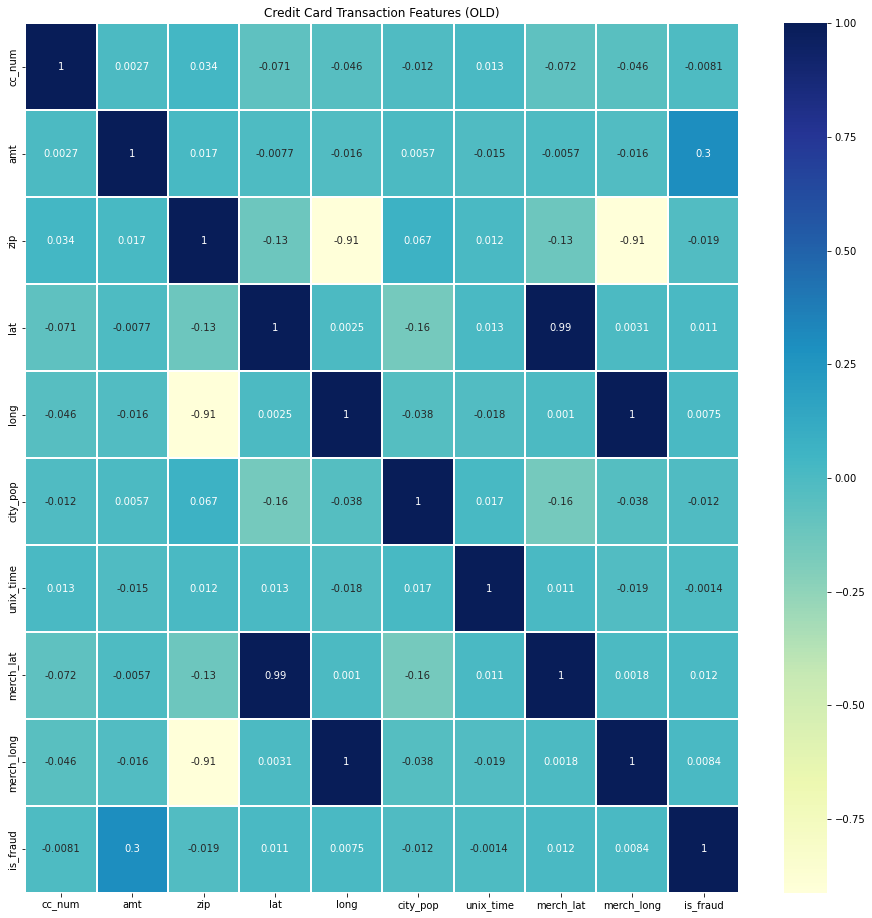

In [41]:
fig, ax = plt.subplots(figsize=(16,16))
plt.title('Credit Card Transaction Features (OLD)')
sns.heatmap(df2.corr(), annot=True, linewidths=.1, cmap="YlGnBu")
plt.show()

We will drop the variable **'year'** in visualising the correlations.

In [42]:
data_new = data_new.drop(columns='year')

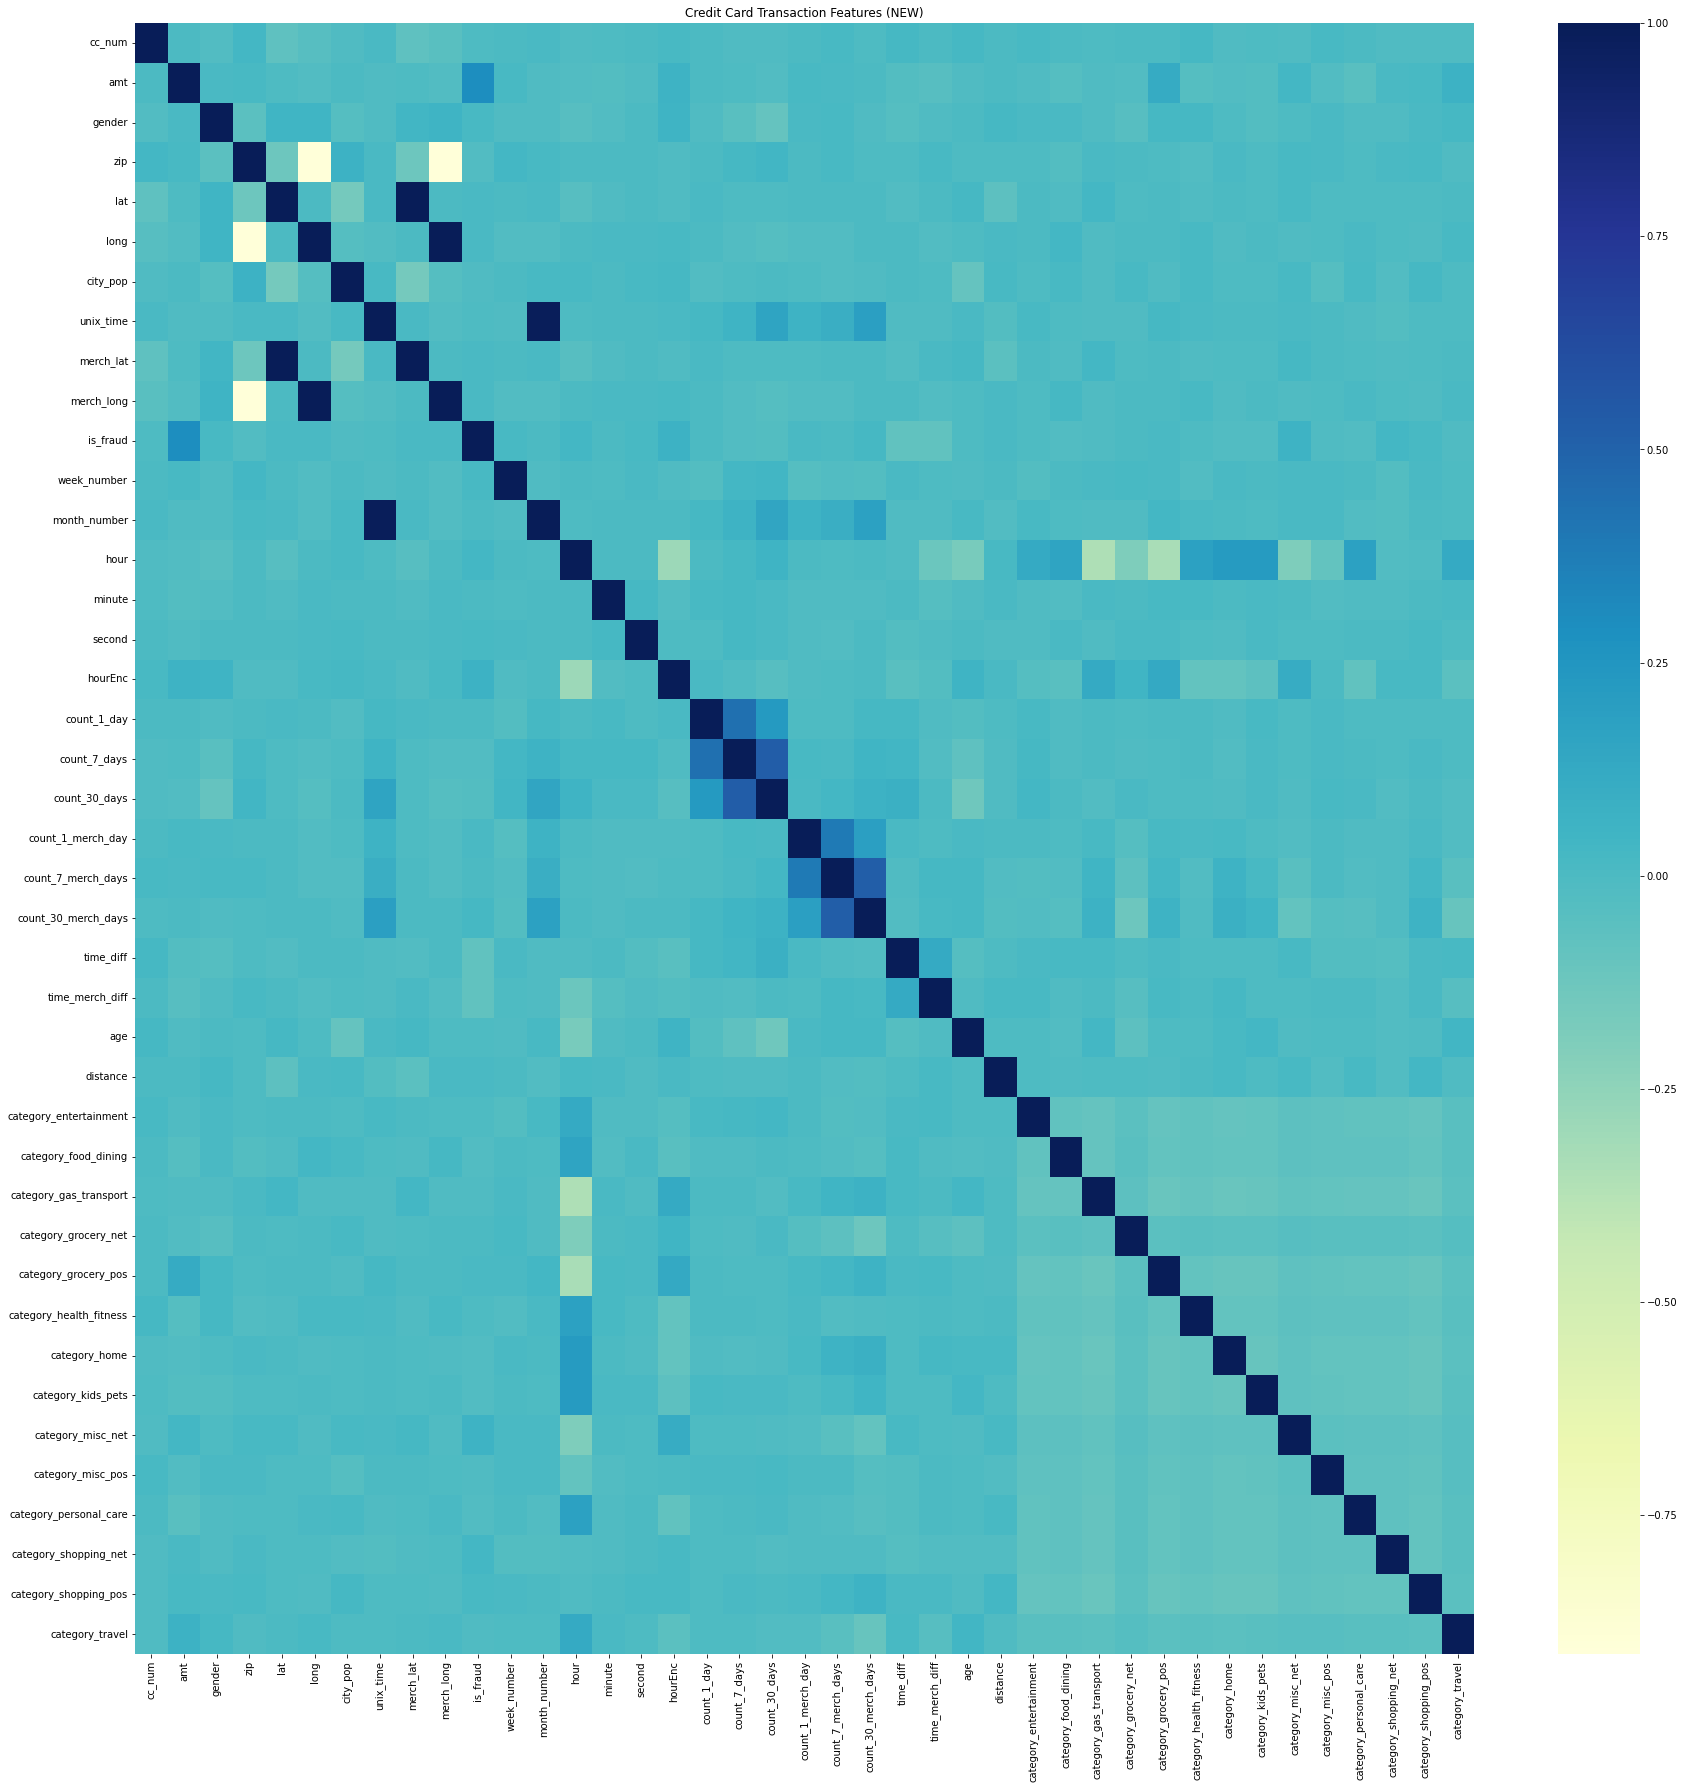

In [43]:
corrdata = data_new[['is_fraud','amt', 'gender', 'age',
       'week_number', 'month_number','hour', 'minute','second','hourEnc',
       'time_diff','time_merch_diff',
       'count_1_day','count_7_days','count_30_days',
       'count_1_merch_day','count_7_merch_days','count_30_merch_days',
       'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']]
fig, ax = plt.subplots(figsize=(30,30))
plt.title('Credit Card Transaction Features (NEW)')
sns.heatmap(data_new.corr(), cmap="YlGnBu")
plt.show()

In [44]:
data_new.corr()['is_fraud'].abs().sort_values(ascending=False)

is_fraud                   1.000000
amt                        0.296730
time_diff                  0.078180
time_merch_diff            0.075944
hourEnc                    0.068139
category_misc_net          0.064516
count_30_days              0.030317
category_shopping_net      0.029159
hour                       0.028790
count_30_merch_days        0.023779
count_7_days               0.021326
category_shopping_pos      0.020660
gender                     0.020460
category_home              0.019852
second                     0.019244
zip                        0.019088
category_kids_pets         0.019024
category_food_dining       0.017037
category_personal_care     0.016851
category_misc_pos          0.015919
week_number                0.014529
count_1_merch_day          0.013038
merch_lat                  0.012210
city_pop                   0.011563
lat                        0.011144
category_gas_transport     0.010620
category_grocery_pos       0.010375
category_travel            0

We can see that some of the new variables have managed to result in a **higher correlation** with **'is_fraud'**. As such, with this information, we can better extract variables to be used in building the detection model. 

# Train-Test Split

We want to do the train-test split now as we want to include more variables and perform further data transformation on it. Specifically **label encoding** on **'merchant'** and **'job'**. As such we have to perform train-test split first to **PREVENT DATA LEAKAGE**. Furthermore, we have to resolve the class imbalance on the **'is_fraud'** variable as well. 

In [45]:
data = data_new

In [46]:
#split dataset into train and test
df = data.drop(['is_fraud'], axis =1)
X = pd.DataFrame(df)
y = pd.DataFrame(data['is_fraud'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

## Merchant (LE)

In [47]:
# Train data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train = X_train['merchant']
X_train['merchant_number'] = label_encoder.fit_transform(train)

# Test data
test = X_test['merchant']
X_test['merchant_number'] = label_encoder.fit_transform(test)

print('Merchant Number of train dataset',X_train['merchant_number'])
print('Merchant Number of test dataset',X_test['merchant_number'])

Merchant Number of train dataset 2322    518
1310    501
2266     71
4816    319
4324    673
       ... 
4171     99
599      29
1361    236
1547    625
4959    161
Name: merchant_number, Length: 3889, dtype: int64
Merchant Number of test dataset 4746     58
1250    357
54      452
4618    448
5352    611
       ... 
1851    609
790     203
2858     58
823     276
1237    197
Name: merchant_number, Length: 1668, dtype: int64


## Job (LE)

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Train data
train = X_train['job']
X_train['job_number'] = label_encoder.fit_transform(train)
print(X_train['job_number'])

# Test data
test = X_test['job']
X_test['job_number'] = label_encoder.fit_transform(test)
print(X_test['job_number'])

2322    308
1310    262
2266    284
4816    400
4324    313
       ... 
4171    442
599       2
1361     52
1547    254
4959     24
Name: job_number, Length: 3889, dtype: int64
4746    244
1250     18
54       41
4618    296
5352    298
       ... 
1851    377
790     266
2858    101
823     311
1237    131
Name: job_number, Length: 1668, dtype: int64


We now want to see the correlation that **Merchant** and **Job** has on **is_fraud**. We will be using the train test set to visualise it.

In [49]:
xtemp = X_train
ytemp = y_train
m_train = pd.concat([xtemp, pd.DataFrame(ytemp)], axis=1)
m_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,job_number,is_fraud
2322,2020-06-29 19:47:55,4451952084362894,fraud_Rolfson-Kunde,personal_care,74.95,Joseph,Davis,1,941 Adam Stravenue,Nazareth,...,0,0,0,1,0,0,0,518,308,0
1310,2020-09-20 12:45:37,676148621961,fraud_Reilly LLC,home,11.63,Jennifer,Vega,0,91644 Crystal Drives,Eagarville,...,0,0,0,0,0,0,0,501,262,0
2266,2020-08-29 02:16:03,3514865930894695,fraud_Bradtke PLC,grocery_pos,169.67,Christopher,Castaneda,1,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,0,0,0,0,0,0,0,71,284,0
4816,2020-08-23 23:01:32,346273234529002,"fraud_Kling, Howe and Schneider",home,10.33,Donna,Moreno,0,32301 Albert River Suite 364,Ronceverte,...,0,0,0,0,0,0,0,319,400,0
4324,2020-07-04 20:39:24,213161231269724,"fraud_Yost, Schamberger and Windler",kids_pets,54.06,Alyssa,Morgan,0,622 Robin Run Suite 764,Gadsden,...,1,0,0,0,0,0,0,673,313,0


In [50]:
m_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3889 entries, 2322 to 4959
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trans_date_trans_time    3889 non-null   datetime64[ns]
 1   cc_num                   3889 non-null   int64         
 2   merchant                 3889 non-null   object        
 3   category                 3889 non-null   object        
 4   amt                      3889 non-null   float64       
 5   first                    3889 non-null   object        
 6   last                     3889 non-null   object        
 7   gender                   3889 non-null   int64         
 8   street                   3889 non-null   object        
 9   city                     3889 non-null   object        
 10  state                    3889 non-null   object        
 11  zip                      3889 non-null   int64         
 12  lat                      3889 n

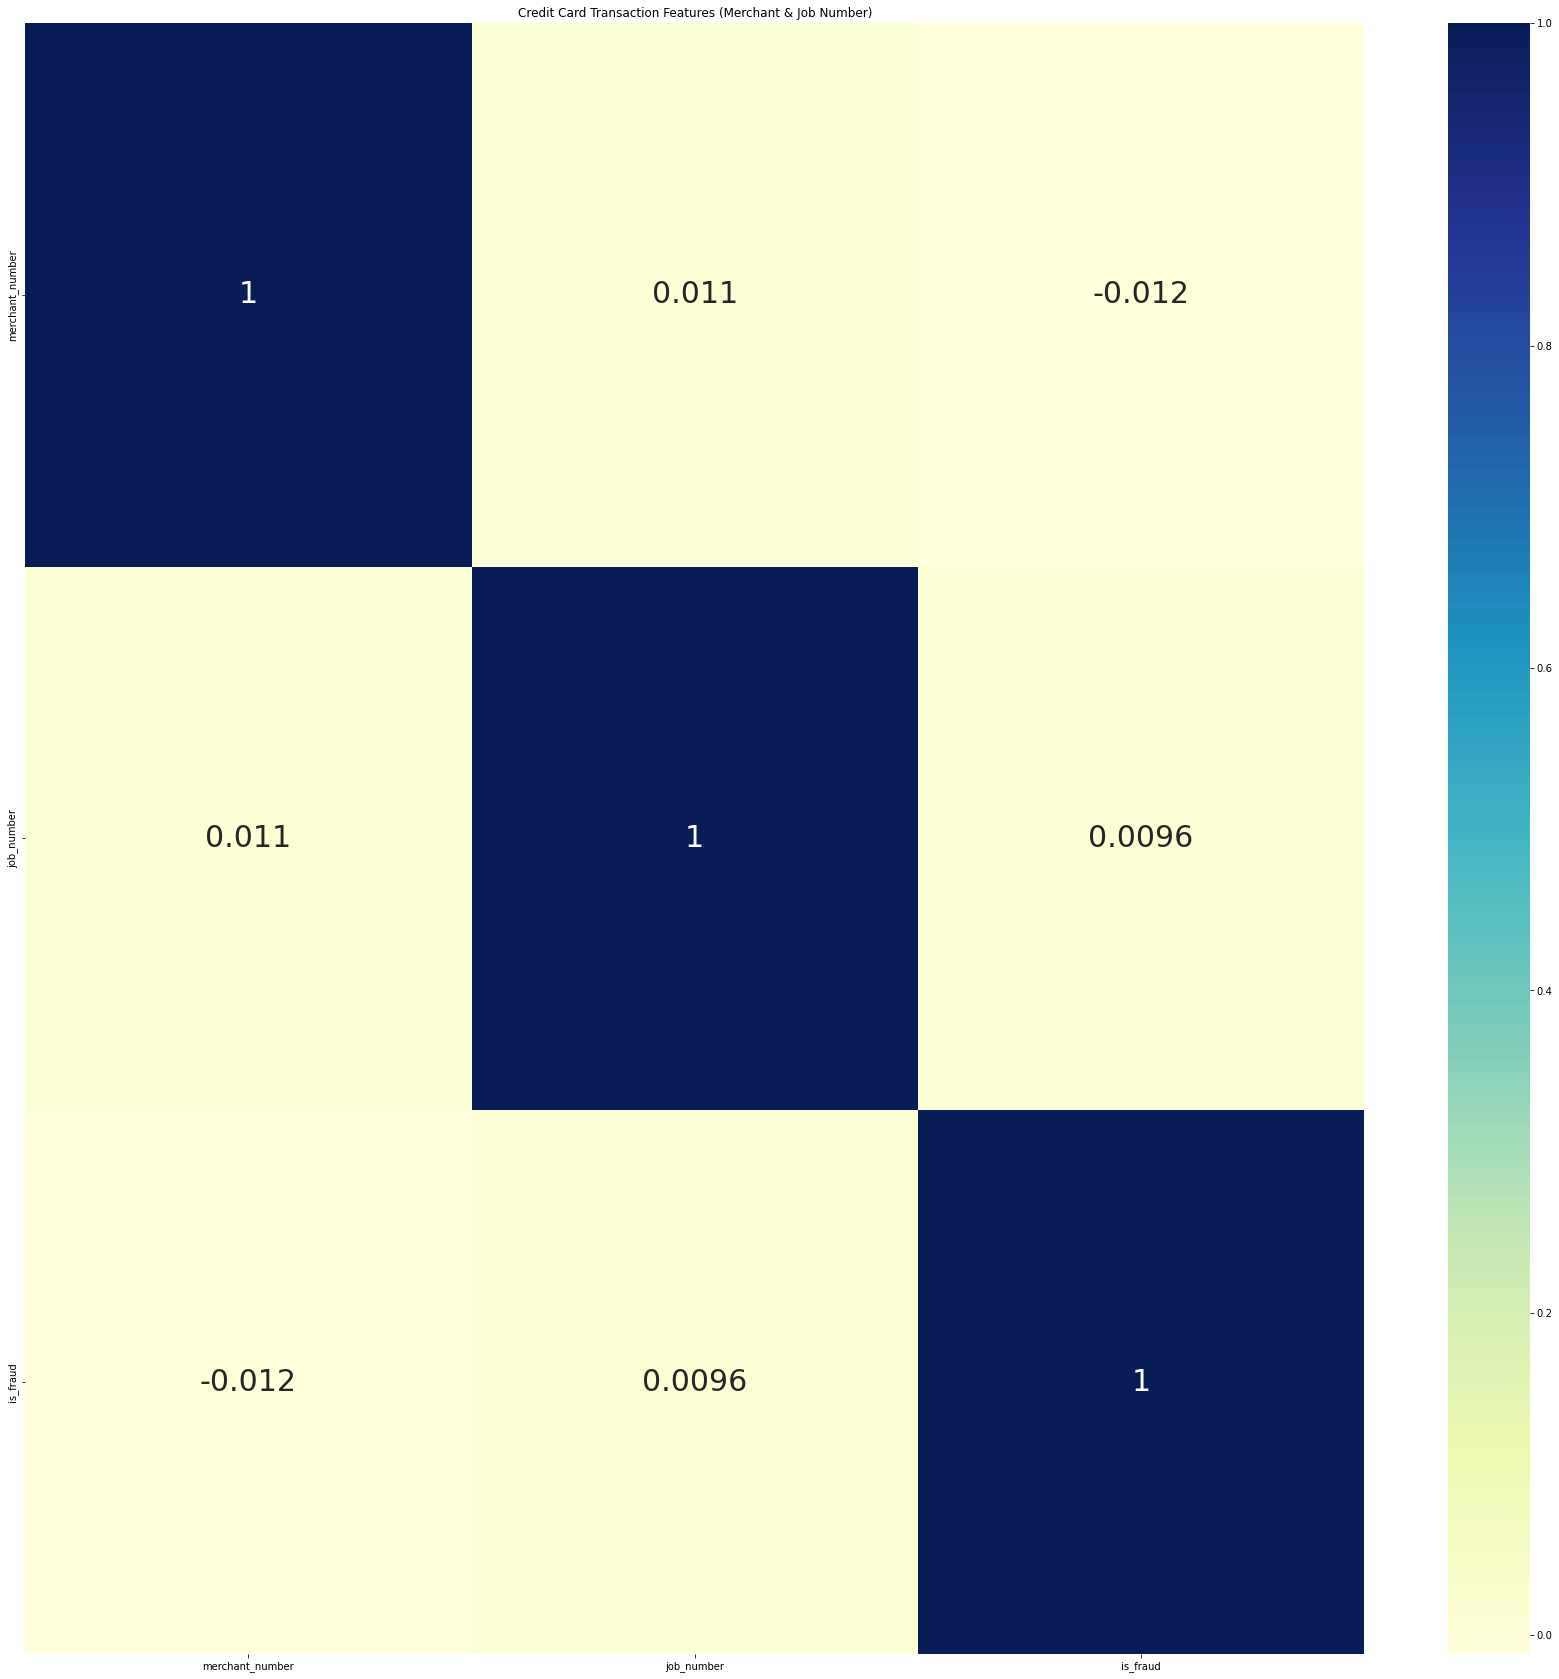

In [51]:
corrdata = m_train[['merchant_number','job_number', 'is_fraud']]
fig, ax = plt.subplots(figsize=(30,30))
plt.title('Credit Card Transaction Features (Merchant & Job Number)')
sns.heatmap(corrdata.corr(),annot=True,annot_kws={"size":30}, cmap="YlGnBu")
plt.show()

In [52]:
m_train.corr()['is_fraud'].abs().sort_values(ascending=False).head(11)

is_fraud                 1.000000
amt                      0.318260
time_diff                0.089312
time_merch_diff          0.086677
hourEnc                  0.071649
category_misc_net        0.067898
category_shopping_net    0.038082
count_30_days            0.037435
hour                     0.035621
count_7_days             0.029476
gender                   0.024343
Name: is_fraud, dtype: float64

Based on the correlations obtained from the train set, we will select the **TOP 10** variables with the highest correlation. The variables are as such, 
**'is_fraud will be the y (response variable), 'amt', 'time_diff', 'time_merch_diff', 'hourEnc', 'category_misc_net', 'category_shopping_net', 'count_30_days', 'hour', 'count_7_days', 'gender'.**

# Feature Selection

The features that we have selected for building the model are below. **They are ALL numerical**.

In [53]:
# Train set
X_train = X_train[['amt', 'time_diff', 'time_merch_diff', 'hourEnc', 'category_misc_net', 'category_shopping_net',
                   'count_30_days', 'hour', 'count_7_days', 'gender']]
# Test set
X_test = X_test[['amt', 'time_diff', 'time_merch_diff', 'hourEnc', 'category_misc_net', 'category_shopping_net',
                   'count_30_days', 'hour', 'count_7_days', 'gender']]

# Feature Scaling

There is a very pivotal reason as to why we do scaling. Note that in the data there are variables with a **LARGE** range of values such as **'amt'** in comparison to others. The values are also significantly higher. In order to prevent such variables from **dominating** the other variables, we should do feature scaling. 


**Also a side note, as the correlation values are NOT high enough and because we performed one-hot and label encoding for categorical variables, we will NOT be doing Principal Component Analysis (PCA)**


We will be testing 3 methods of scaling, namely **Robust Scaling, MinMax Scaling and Standard Scaling**

In [54]:
# Importing the necessary stuff
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

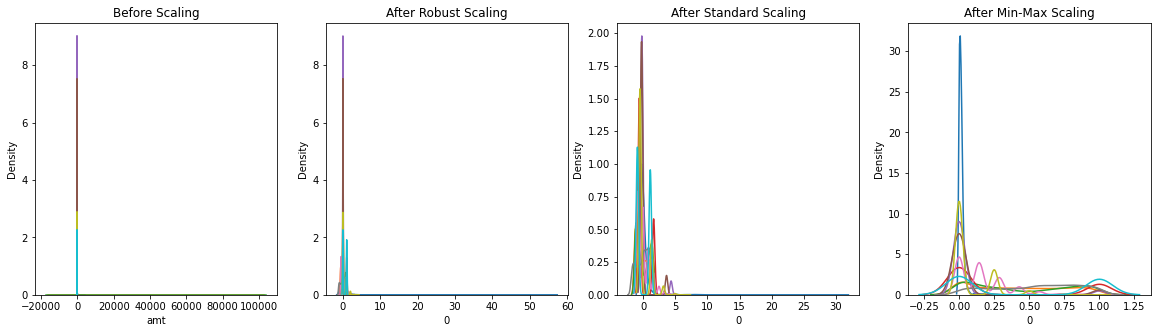

In [55]:
# We will use the X_train set to determine which scaling method to use
# Credits to paymanfara @kaggle
scaler = RobustScaler()
robust_df = scaler.fit_transform(X_train)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(X_train)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X_train)
minmax_df = pd.DataFrame(minmax_df)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['amt'], ax = ax1)
sns.kdeplot(X_train['time_diff'], ax = ax1)
sns.kdeplot(X_train['time_merch_diff'], ax = ax1)
sns.kdeplot(X_train['hourEnc'], ax = ax1)
sns.kdeplot(X_train['category_misc_net'], ax = ax1)
sns.kdeplot(X_train['category_shopping_net'], ax = ax1)
sns.kdeplot(X_train['count_30_days'], ax = ax1)
sns.kdeplot(X_train['hour'], ax = ax1)
sns.kdeplot(X_train['count_7_days'], ax = ax1)
sns.kdeplot(X_train['gender'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[0], ax = ax2)
sns.kdeplot(robust_df[1], ax = ax2)
sns.kdeplot(robust_df[2], ax = ax2)
sns.kdeplot(robust_df[3], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[6], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[9], ax = ax2)

ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[0], ax = ax3)
sns.kdeplot(standard_df[1], ax = ax3)
sns.kdeplot(standard_df[2], ax = ax3)
sns.kdeplot(standard_df[3], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[6], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[9], ax = ax3)

ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[0], ax = ax4)
sns.kdeplot(minmax_df[1], ax = ax4)
sns.kdeplot(minmax_df[2], ax = ax4)
sns.kdeplot(minmax_df[3], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[6], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[9], ax = ax4)

plt.show()

**Min-Max** is sensitive to outliers. **Standard** assumes a normal distribution. **Robust** is robust against outliers. Thus we should go with the **Robust Scaler** considering our natural outliers.

In [56]:
# Transformation using Robust Scaling
scaler = RobustScaler()
trainnew = scaler.fit_transform(X_train)
testnew = scaler.fit_transform(X_test)

In [57]:
X_train = pd.DataFrame(trainnew, columns=X_train.columns)
X_train.head()

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender
0,0.396868,0.407475,-0.152039,0.0,0.0,0.0,-0.5,0.416667,0.0,1.0
1,-0.488603,-0.427355,-0.509001,0.0,0.0,0.0,0.0,-0.166667,0.0,0.0
2,1.721438,-0.574655,0.917062,1.0,0.0,0.0,1.0,-1.000000,0.0,1.0
3,-0.506782,0.169661,-0.240565,1.0,0.0,0.0,1.0,0.750000,1.0,0.0
4,0.104741,-0.297437,-0.259510,0.0,0.0,0.0,0.0,0.500000,1.0,0.0


In [58]:
X_test = pd.DataFrame(testnew, columns=X_test.columns)
X_test.head()

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender
0,-0.540403,0.966914,0.833796,0.0,0.0,0.0,0.5,-0.272727,1.0,0.0
1,-0.159797,-0.135121,-0.009999,0.0,0.0,0.0,-0.5,0.454545,0.0,0.0
2,-0.562775,-0.612759,-0.508462,0.0,0.0,0.0,0.0,-0.090909,0.0,1.0
3,0.872344,0.368851,0.307680,1.0,0.0,0.0,0.5,-1.272727,0.0,1.0
4,-0.600981,1.015803,0.205359,0.0,1.0,0.0,0.5,0.272727,0.0,0.0


# Resolving the imbalance

In [59]:
print(data_new.groupby('is_fraud').size())

is_fraud
0    5536
1      21
dtype: int64


#### As we noticed before, The Dataset is heavily skewed and severely imbalanced. 
#### Majority (5536 count) belongs to the 'not fraud' category (is_fraud == 0) while only 21 count belongs to 'is fraud' category.
 
we are going to look at 3 techniques to resolve this imbalance:
    
    Method 1: Undersampling
    Method 2: Oversampling
    Method 3: SMOTE

In [60]:
#First we combine back the train-test split to get a full clean and processed dataset

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
dfnew_X = X_train.append(X_test)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
dfnew_y = y_train.append(y_test)

data_new = pd.concat([dfnew_X, dfnew_y], axis=1)
data_new.head()

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender,is_fraud
0,0.396868,0.407475,-0.152039,0.0,0.0,0.0,-0.5,0.416667,0.0,1.0,0
1,-0.488603,-0.427355,-0.509001,0.0,0.0,0.0,0.0,-0.166667,0.0,0.0,0
2,1.721438,-0.574655,0.917062,1.0,0.0,0.0,1.0,-1.000000,0.0,1.0,0
3,-0.506782,0.169661,-0.240565,1.0,0.0,0.0,1.0,0.750000,1.0,0.0,0
4,0.104741,-0.297437,-0.259510,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0


In [61]:
#split into X and y
dfy = data_new[['is_fraud']]
dfX = data_new.drop('is_fraud', axis=1)

# 1. Undersample
### Reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class

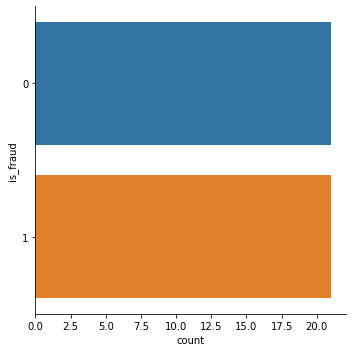

In [62]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_US, y_US = undersample.fit_resample(dfX, dfy)   #dosent work with non numerical values

#number of is_fraud=1 and is_fraud=0 is equal
sns.catplot(y = "is_fraud", data = y_US, kind = "count")

In [63]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_US = pd.concat([X_US, y_US], axis=1)
data_US.head()

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender,is_fraud
0,0.554048,0.023394,-0.117538,0.0,0.0,0.0,-0.5,-0.500000,0.0,1.0,0
1,0.069501,0.393701,-0.252600,0.0,0.0,0.0,0.5,0.416667,1.0,0.0,0
2,0.366942,-0.095851,0.146005,0.0,0.0,0.0,-0.5,-0.250000,0.0,0.0,0
3,0.318576,0.645663,-0.413573,1.0,0.0,0.0,0.5,0.727273,0.0,1.0,0
4,0.429562,0.688460,0.097760,0.0,0.0,0.0,1.0,-0.272727,0.0,0.0,0


In [64]:
#check count
print(data_US.groupby('is_fraud').size())

is_fraud
0    21
1    21
dtype: int64


#### Disadvantage: The deletion of observations in this random manner may lead to the deletion of some very useful information from the dataset

# 2. Oversampling
### Random over-sampling is a technique that randomly samples a number of observations from the minority class (sampling is done with replacement) and adds them to the dataset. 

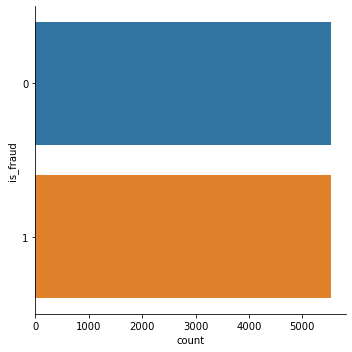

In [65]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OS, y_OS = oversample.fit_resample(dfX, dfy)

#number of is_fraud=1 and is_fraud=0 is equal
sns.catplot(y = "is_fraud", data = y_OS, kind = "count")

In [66]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_OS = pd.concat([X_OS, y_OS], axis=1)
data_OS.head()

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender,is_fraud
0,0.396868,0.407475,-0.152039,0.0,0.0,0.0,-0.5,0.416667,0.0,1.0,0
1,-0.488603,-0.427355,-0.509001,0.0,0.0,0.0,0.0,-0.166667,0.0,0.0,0
2,1.721438,-0.574655,0.917062,1.0,0.0,0.0,1.0,-1.000000,0.0,1.0,0
3,-0.506782,0.169661,-0.240565,1.0,0.0,0.0,1.0,0.750000,1.0,0.0,0
4,0.104741,-0.297437,-0.259510,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0


In [67]:
#check count
print(data_OS.groupby('is_fraud').size())

is_fraud
0    5536
1    5536
dtype: int64


#### Disadvantage: This technique may increase the chance of model overfitting.

# 3. SMOTE
### SMOTE is a technique that generates new observations by interpolating between observations in the original dataset. Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). 

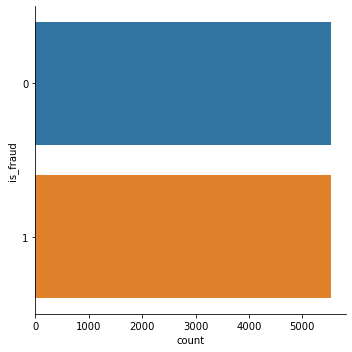

In [68]:
#import SMOTENC (this considers categorical variables and discrete variables, SMOTE only considers discrete variables)
from imblearn.over_sampling import SMOTE

#non numeric
smote = SMOTE()
X_SM, y_SM = smote.fit_resample(dfX, dfy)

#number of is_fraud=1 and is_fraud=0 is equal
sns.catplot(y = "is_fraud", data = y_SM, kind = "count")

In [69]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_SM = pd.concat([X_SM, y_SM], axis=1)
data_SM.head()

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender,is_fraud
0,0.396868,0.407475,-0.152039,0.0,0.0,0.0,-0.5,0.416667,0.0,1.0,0
1,-0.488603,-0.427355,-0.509001,0.0,0.0,0.0,0.0,-0.166667,0.0,0.0,0
2,1.721438,-0.574655,0.917062,1.0,0.0,0.0,1.0,-1.000000,0.0,1.0,0
3,-0.506782,0.169661,-0.240565,1.0,0.0,0.0,1.0,0.750000,1.0,0.0,0
4,0.104741,-0.297437,-0.259510,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0


In [70]:
#check count
print(data_SM.groupby('is_fraud').size())

is_fraud
0    5536
1    5536
dtype: int64


How do we decide which method to adopt? Well we can take a look at the correlation between is_fraud and amt after each method through a scatterplot graph.

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender,is_fraud
amt,1.000000,-0.567881,-0.520769,0.267766,0.276365,0.332206,-0.244165,0.270246,-0.037062,0.075468,0.762971
time_diff,-0.567881,1.000000,0.623444,-0.280211,-0.191093,-0.102547,0.530909,-0.175836,0.155935,-0.198623,-0.762361
time_merch_diff,-0.520769,0.623444,1.000000,-0.368415,-0.099194,-0.197889,0.138847,-0.242369,-0.155458,-0.159864,-0.706390
hourEnc,0.267766,-0.280211,-0.368415,1.000000,0.219686,-0.155700,0.016514,-0.000691,0.056080,0.286039,0.476731
category_misc_net,0.276365,-0.191093,-0.099194,0.219686,1.000000,-0.198030,0.021004,-0.041921,0.008916,0.242536,0.242536
category_shopping_net,0.332206,-0.102547,-0.197889,-0.155700,-0.198030,1.000000,-0.188562,0.169090,0.060030,-0.136083,0.136083
count_30_days,-0.244165,0.530909,0.138847,0.016514,0.021004,-0.188562,1.000000,0.032706,0.394763,-0.346410,-0.230940
hour,0.270246,-0.175836,-0.242369,-0.000691,-0.041921,0.169090,0.032706,1.000000,0.255520,-0.203332,0.062584
count_7_days,-0.037062,0.155935,-0.155458,0.056080,0.008916,0.060030,0.394763,0.255520,1.000000,-0.073521,-0.073521
gender,0.075468,-0.198623,-0.159864,0.286039,0.242536,-0.136083,-0.346410,-0.203332,-0.073521,1.000000,0.238095


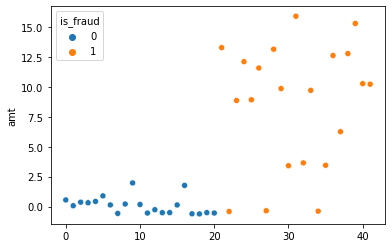

In [71]:
sns.scatterplot(data=data_US, x=data_US.index, y='amt', hue='is_fraud')
data_US.corr()

Correlation between **amt** and **is_fraud** = **0.762971**

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender,is_fraud
amt,1.000000,-0.503031,-0.492022,0.268901,0.333150,0.383045,-0.270710,0.375685,-0.122898,0.015688,0.741037
time_diff,-0.503031,1.000000,0.508893,-0.349626,-0.202165,-0.133776,0.250391,-0.131236,0.163764,-0.131821,-0.672754
time_merch_diff,-0.492022,0.508893,1.000000,-0.332960,-0.204523,-0.123226,0.193560,-0.172309,0.122158,-0.118770,-0.658953
hourEnc,0.268901,-0.349626,-0.332960,1.000000,0.362919,-0.050650,-0.137568,-0.000867,-0.054851,0.215384,0.490064
category_misc_net,0.333150,-0.202165,-0.204523,0.362919,1.000000,-0.172087,-0.040607,-0.019251,-0.002040,0.079905,0.310593
category_shopping_net,0.383045,-0.133776,-0.123226,-0.050650,-0.172087,1.000000,-0.202215,0.158083,-0.099035,-0.043307,0.176332
count_30_days,-0.270710,0.250391,0.193560,-0.137568,-0.040607,-0.202215,1.000000,-0.011699,0.494113,-0.189604,-0.295192
hour,0.375685,-0.131236,-0.172309,-0.000867,-0.019251,0.158083,-0.011699,1.000000,0.082085,-0.125622,0.180330
count_7_days,-0.122898,0.163764,0.122158,-0.054851,-0.002040,-0.099035,0.494113,0.082085,1.000000,0.016424,-0.204981
gender,0.015688,-0.131821,-0.118770,0.215384,0.079905,-0.043307,-0.189604,-0.125622,0.016424,1.000000,0.172491


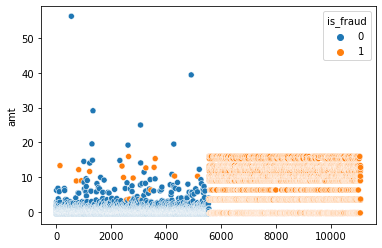

In [72]:
sns.scatterplot(data=data_OS, x=data_OS.index, y='amt', hue='is_fraud')
data_OS.corr()

Correlation between **amt** and **is_fraud** = **0.741037**

,amt,time_diff,time_merch_diff,hourEnc,category_misc_net,category_shopping_net,count_30_days,hour,count_7_days,gender,is_fraud
amt,1.000000,-0.508015,-0.497295,0.296096,0.390098,0.424357,-0.264704,0.396665,-0.134103,0.006962,0.748879
time_diff,-0.508015,1.000000,0.508985,-0.373092,-0.223404,-0.147090,0.256387,-0.140935,0.174097,-0.145881,-0.672898
time_merch_diff,-0.497295,0.508985,1.000000,-0.354395,-0.226318,-0.135712,0.197037,-0.188448,0.131454,-0.131504,-0.658954
hourEnc,0.296096,-0.373092,-0.354395,1.000000,0.384307,-0.027346,-0.155413,-0.031905,-0.076295,0.227385,0.521580
category_misc_net,0.390098,-0.223404,-0.226318,0.384307,1.000000,-0.157559,-0.035593,0.029679,0.010688,0.105260,0.343701
category_shopping_net,0.424357,-0.147090,-0.135712,-0.027346,-0.157559,1.000000,-0.214517,0.200799,-0.109144,-0.062628,0.194496
count_30_days,-0.264704,0.256387,0.197037,-0.155413,-0.035593,-0.214517,1.000000,-0.030183,0.523276,-0.161674,-0.300522
hour,0.396665,-0.140935,-0.188448,-0.031905,0.029679,0.200799,-0.030183,1.000000,0.051746,-0.117749,0.195725
count_7_days,-0.134103,0.174097,0.131454,-0.076295,0.010688,-0.109144,0.523276,0.051746,1.000000,-0.010331,-0.219793
gender,0.006962,-0.145881,-0.131504,0.227385,0.105260,-0.062628,-0.161674,-0.117749,-0.010331,1.000000,0.191160


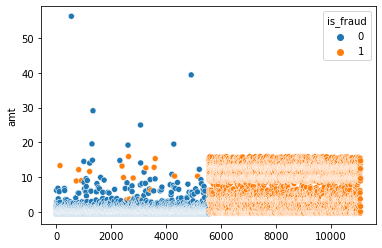

In [73]:
sns.scatterplot(data=data_SM, x=data_SM.index, y='amt', hue='is_fraud')
data_SM.corr()

Correlation between **amt** and **is_fraud** = **0.748879**

Considering the **disadvantages** of Undersampling and Oversampling, **SMOTE** will be the **best** way to balance **our dataset**, despite undersampling having the highest correlation between amt and is_fraud

# Model Building

We will look into **4** classification models to see which is the best machine learning model in helping us to predict fraudulent credit card transactions.

The **4** models are namely, **Gaussian Naive Bayes**, **Random Forest Classifier**, **K-Nearest Neighbors** and **XGBoost**. 

In [74]:
#Combine the SM data and split again
data_SM = pd.concat([X_SM, y_SM],axis=1)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SM,y_SM,test_size=0.2,random_state=12345)

In [76]:
## Assuming the positive are N and negative are Y 
## Function to get TPR(True Positive Rate) and FPR(False Positive Rate)
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

## 1. Naive Bayes (Gaussian)

Naive Bayes is a **CLASSIFICATION** algorithm. Gaussian Naive Bayes is an extension which assumes a Gaussian (Normal) distribution. It is primarily based on Bayes Theorem, P(h|d) = (P(d|h) * P(h)) / P(d).

**P(h|d)** : the probability of hypothesis **h** given the data **d**

**P(d|h)** : the probability of data **d** given the hypothesis h was true

**P(h)** : the probability of hypothesis **h** being true 

**P(d)** : the probability of the data **d**

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

Gaussian Naive Bayes Confusion Matrix (Train)
Classification Accuracy:  0.973015693801513
TPR:  1.0
FPR:  0.053659631791647955


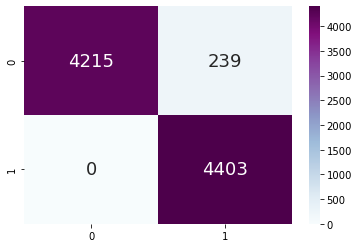

In [79]:
print("Gaussian Naive Bayes Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, gnb_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", gnb.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, gnb_train_pred))
print('FPR: ', get_FPR(y_train, gnb_train_pred))

Gaussian Naive Bayes Confusion Matrix (Test)
Classification Accuracy:  0.9756207674943567
TPR:  1.0
FPR:  0.04990757855822551


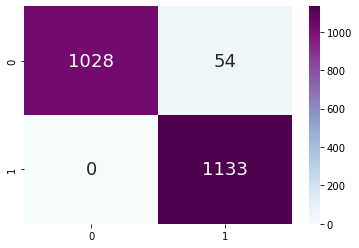

In [80]:
print("Gaussian Naive Bayes Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, gnb_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", gnb.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, gnb_test_pred))
print('FPR: ', get_FPR(y_test, gnb_test_pred))

In [81]:
# F1 Score
print('Gaussian Naive Bayes TRAIN F1 Score: {}'.format(f1_score(y_train,gnb_train_pred)))
print('Gaussian Naive Bayes TEST F1 Score: {}'.format(f1_score(y_test,gnb_test_pred)))

Gaussian Naive Bayes TRAIN F1 Score: 0.973576561636263
Gaussian Naive Bayes TEST F1 Score: 0.9767241379310345


## 2. Random Forest Classifier

Random Forest is a classifier that involves a number of decision trees based on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train)

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

Random Forest Classifier Confusion Matrix (Train)
Classification Accuracy:  0.9945805577509315
TPR:  1.0
FPR:  0.010776829815895825


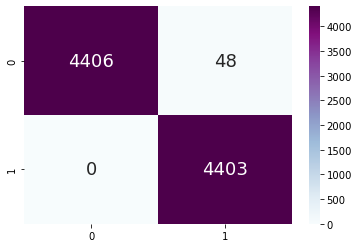

In [83]:
print("Random Forest Classifier Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, rfc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, rfc_train_pred))
print('FPR: ', get_FPR(y_train, rfc_train_pred))

Random Forest Classifier Confusion Matrix (Test)
Classification Accuracy:  0.9941309255079007
TPR:  0.999117387466902
FPR:  0.011090573012939002


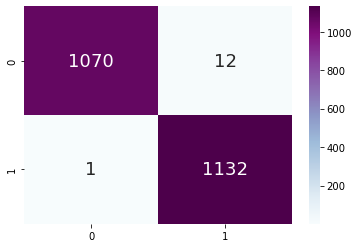

In [84]:
print("Random Forest Classifier Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, rfc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, rfc_test_pred))
print('FPR: ', get_FPR(y_test, rfc_test_pred))

In [85]:
# F1 Score
print('Random Forest Classifier TRAIN F1 Score: {}'.format(f1_score(y_train,rfc_train_pred)))
print('Random Forest Classifier TEST F1 Score: {}'.format(f1_score(y_test,rfc_test_pred)))

Random Forest Classifier TRAIN F1 Score: 0.9945787214818161
Random Forest Classifier TEST F1 Score: 0.9942907334211682


## 3. K-Nearest Neighbors
A supervised machine learning algorithm. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made.

In [86]:
# Optimal k value is 2 based on testing. 
from sklearn.neighbors import KNeighborsClassifier
n=2
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

K-Nearest Neighbors Confusion Matrix (Train)
Classification Accuracy:  0.9998870949531444
TPR:  0.9997728821258233
FPR:  0.0


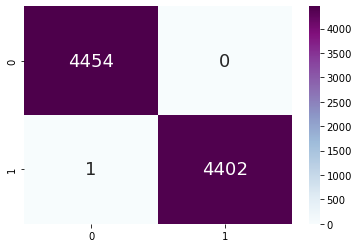

In [87]:
print("K-Nearest Neighbors Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, knn_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, knn_train_pred))
print('FPR: ', get_FPR(y_train, knn_train_pred))

K-Nearest Neighbors Confusion Matrix (Test)
Classification Accuracy:  0.9986455981941309
TPR:  1.0
FPR:  0.0027726432532347504


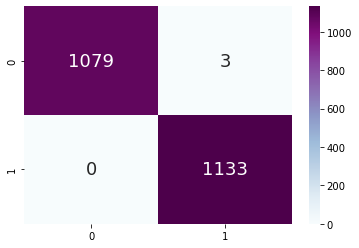

In [88]:
print("K-Nearest Neighbors Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, knn_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, knn_test_pred))
print('FPR: ', get_FPR(y_test, knn_test_pred))

In [89]:
# F1 Score
print('K-Nearest Neighbors TRAIN F1 Score: {}'.format(f1_score(y_train,knn_train_pred)))
print('K-Nearest Neighbors TEST F1 Score: {}'.format(f1_score(y_test,knn_test_pred)))

K-Nearest Neighbors TRAIN F1 Score: 0.999886428165815
K-Nearest Neighbors TEST F1 Score: 0.998677831643896


## 4. XGBoost

Unlike random forest which uses the technique of bagging, XGBoost uses boosting. Boosting involves using trees with fewer splits. Boosting uses an **ensemble** technique which involves the following steps:
- An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
- A new model h1 is fit to the residuals from the previous step
- Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0

Reference: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [90]:
import xgboost as xgb
from xgboost import XGBClassifier

In [91]:
xgbc = XGBClassifier(
         eval_metric='aucpr')
xgbc.fit(X_train, y_train)

xgbc_train_pred = xgbc.predict(X_train)
xgbc_test_pred = xgbc.predict(X_test)

XGBoost Classifier Confusion Matrix (Train)
Classification Accuracy:  1.0
TPR:  1.0
FPR:  0.0


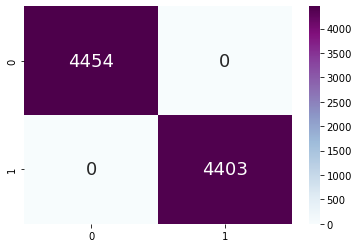

In [92]:
print("XGBoost Classifier Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, xgbc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, xgbc_train_pred))
print('FPR: ', get_FPR(y_train, xgbc_train_pred))

XGBoost Classifier Confusion Matrix (Test)
Classification Accuracy:  0.9990970654627539
TPR:  1.0
FPR:  0.0018484288354898336


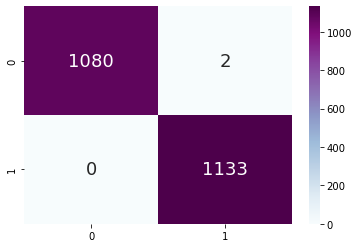

In [93]:
print("XGBoost Classifier Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, xgbc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, xgbc_test_pred))
print('FPR: ', get_FPR(y_test, xgbc_test_pred))

In [94]:
# F1 Score
print('XGBoost TRAIN F1 Score: {}'.format(f1_score(y_train,xgbc_train_pred)))
print('XGBoost TEST F1 Score: {}'.format(f1_score(y_test,xgbc_test_pred)))

XGBoost TRAIN F1 Score: 1.0
XGBoost TEST F1 Score: 0.9991181657848325


### AUROC Evaluation

**Code credits : PAYMAN @kaggle**

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [GaussianNB(),
               RandomForestClassifier(max_depth=4),
               KNeighborsClassifier(n_neighbors=2),
               XGBClassifier(eval_metric='aucpr')
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

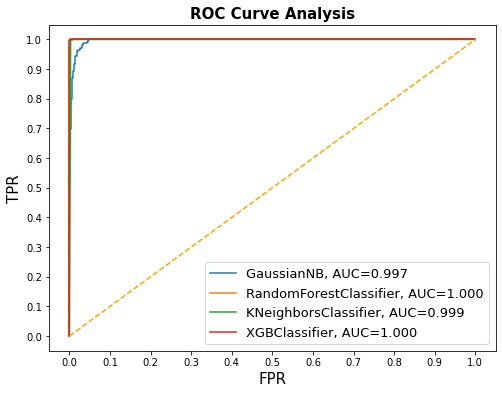

In [96]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("FPR", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("TPR", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

So when it came to model evaluation, there were a few metrics that we focused on to determine the best and most suitable model for credit card fraud detection. The metrics we took into consideration are:

Reference: https://www.ritchieng.com/machine-learning-evaluate-classification-model/

1. **Confusion Matrix** (Visualisation)

    - Describes the performance of the classification model
    - TP, TN, FP, FN
    

2. **Classification Accuracy**

    - The percentage of correct predictions
    - The **higher** the classification accuracy the **better** the model
    

3. **TPR** (Sensitivity)

    - TPR is known as sensitivity and is **crucial** in the context of detecting fraudulant transactions
    - We should try to optimize the **TPR Value** as much as possible. This is because **FP** values are more 
      acceptable in comparison to **FN** values. 
    - **FP** are the normal transactions detected as fraud transactions
    - **FN** are the fraud transactions detected as normal transactions
    - So definitely **higher TPR values** would be **better**
    

4. **FPR** (Specificity)

    - False Positive Rate is the probability of falsely rejecting the null hypothesis
    - **Lower FPR values** would be **better**
    

5. **F1 Scores**

    - F1 Score is defined as the "harmonic mean of **precision** and **recall**
    - **F1 = 2*(Precision*Recall/Precision+Recall)**
    - The **higher the F1 score** the **better**


6. **Receiver Operating Characteristic (ROC) Curves**

    - ROC curves are used for us to **VISUALISE** how **TPR** and **FPR** vary various thresholds


7. **AUC Values**

    - AUC is the **percentage** of the **ROC plot** underneath the **curve**
    - Essentially it is a **single number summary** of a classifier's performance
    - A **higher AUC value** indicates a **better classifier**
    - AUC is **good** for data with **huge class imbalance** but we have resolved it using **SMOTE**

### 1. Classification Accuracy
**XGBoost** has the **highest classification accuracy value** of **1.0** for **Train set** and **0.99910 (5.SF)** for **Test set**

### 2. Highest TPR Value
**XGBoost** has the **highest TPR value** of **1.0** for **BOTH Train and Test sets**

### 3. Lowest FPR Value
**XGBoost** has the **lowest FPR value** of **0.0** for **Train set** and **0.0018484 (5.SF)** for **Test set**

### 4. F1 Score
**XGBoost** has the **highest F1 score** of **1.0** for **Train set** and **0.99912** for **Test set**

### 5. ROC & AUC
**XGBoost** and **RandomForestClassifier** have the **highest AUC value** of **1.0**

### To conclude, XGBoost has been determined to be the BEST and MOST SUITABLE machine learning model to detect fraudulant credit card transactions. 